In [2]:
from utils.load_results import *
from utils.plot_helpers import *
from utils.analysis_from_interaction import error_analysis

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('default')
import random
from seaborn.algorithms import bootstrap

# Check Dataset

A higher number of fixed attributes (more 1s in the fixed vector) means fewer objects match all constraints, resulting in fewer target objects.
The number of target objects for a concept depends on the "fixed vector":
Each 1 in the fixed vector means that attribute is fixed (i.e., must have a specific value).
The more attributes are fixed, the fewer objects satisfy all fixed constraints.
For concept_idx = 6, more attributes are fixed compared to more generic concepts, so there are fewer possible target objects.

In [3]:
from dataset import *
zero_shot_dataset_path = 'dataset/feat_rep_zero_concept_dataset'
data_zero_shot = torch.load(zero_shot_dataset_path, map_location=torch.device('cpu') )

C:\Users\Isabella\AppData\Local\Temp\ipykernel_17616\1913290924.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_zero_shot = torch.load(zero_shot_dataset_path, map_l

In [4]:
concepts = data_zero_shot.get_all_concepts()

concept_idx = 6
print("Concept at index ", concept_idx, ":")
print("  Target objects:", concepts[concept_idx][0])
print("  Fixed vector:", concepts[concept_idx][1])


print("- - - - - - - - - - - - - - - - - - - -")
concept_idx = 6
max_context_condition = sum(concepts[concept_idx][1])
print("Max context condition for this concept:", max_context_condition)
context_condition = 2

print("Get sample for concept_idx = ", concept_idx, " and context_condition = ", context_condition)
data_zero_shot.get_sample(concept_idx, context_condition)

Concept at index  6 :
  Target objects: [(0.0, 1.25, 1.0)]
  Fixed vector: (1, 1, 1)
- - - - - - - - - - - - - - - - - - - -
Max context condition for this concept: 3
Get sample for concept_idx =  6  and context_condition =  2


([[(0.0, 1.25, 1.0),
   (0.0, 1.25, 1.0),
   (0.0, 1.25, 1.0),
   (0.0, 1.25, 1.0),
   (0.0, 1.25, 1.0),
   (0.0, 1.25, 1.0),
   (0.0, 1.25, 1.0),
   (0.0, 1.25, 1.0),
   (0.0, 1.25, 1.0),
   (0.0, 1.25, 1.0)],
  (1, 1, 1)],
 [[[(0.0, 1.25, 3.0),
    (0.0, 1.1071428571428572, 1.0),
    (0.2, 1.25, 1.0),
    (0.4, 1.25, 1.0),
    (0.4, 1.25, 1.0),
    (0.8, 1.25, 1.0),
    (0.0, 0.75, 1.0),
    (0.2, 1.25, 1.0),
    (0.2, 1.25, 1.0),
    (0.2, 1.25, 1.0)],
   2]])

In [5]:
print("- - - - - - - - - - - - - - - - - - - -")
# - sender_input: (sender_input_objects, sender_labels)
# - labels: indices of target objects in the receiver_input
# - receiver_input: receiver_input_objects

sender_input, receiver_label = data_zero_shot.get_sample(concept_idx, context_condition)
print("Returned tuple structure:")
print("  sender_input shape:", len(sender_input))
print("  receiver_label shape:", len(receiver_label))
#print("  receiver_input shape:", len(receiver_input))

- - - - - - - - - - - - - - - - - - - -
Returned tuple structure:
  sender_input shape: 2
  receiver_label shape: 1


In [16]:
images = data_zero_shot.images
labels = data_zero_shot.labels

print(images.shape)

(96000, 100)


# ZeroShot Quantitative analyses
Reproduction of the results from the paper "Agents can generalize to novel levels of abstraction with the help of language" using the 3dshapes dataset.


In [3]:
game_size = 10
n_values = [4,]
n_attributes = [3,]
n_epochs = 300
n_datasets = 2 #len(datasets)
datasets = ['(3,4)',]
path_3ds_zs = ['results/3dshapes/' + 'shapes3d_feat_rep_game_size_' + str(game_size) + '_vsf_3']
path_zs = ['results/(3,4)_game_size_10_vsf_3']


In [4]:
context_unaware = False # whether original or context_unaware simulations are evaluated
if context_unaware:
    setting = 'context_unaware'
else:
    setting = 'standard' # context-aware

In [5]:
# 3dshapes 
all_accuracies_3ds = load_accuracies(path_3ds_zs, n_runs=5, n_epochs=300, val_steps=1, zero_shot=True, context_unaware=context_unaware)

# to specific
zs_specific_train_acc_3ds = all_accuracies_3ds['zs_specific_train_acc']
zs_specific_val_acc_3ds = all_accuracies_3ds['zs_specific_val_acc']
zs_specific_test_acc_3ds = all_accuracies_3ds['zs_specific_test_acc']
zs_specific_train_message_length_3ds = all_accuracies_3ds['zs_specific_train_message_length']

# to generic
zs_generic_train_acc_3ds = all_accuracies_3ds['zs_generic_train_acc']
zs_generic_val_acc_3ds = all_accuracies_3ds['zs_generic_val_acc']
zs_generic_test_acc_3ds = all_accuracies_3ds['zs_generic_test_acc']
zs_generic_train_message_length_3ds = all_accuracies_3ds['zs_generic_train_message_length']


In [6]:
# Not 3dshapes
all_accuracies = load_accuracies(path_zs, n_runs=5, n_epochs=300, val_steps=1, zero_shot=True, context_unaware=context_unaware)

# to specific
zs_specific_train_acc = all_accuracies['zs_specific_train_acc']
zs_specific_val_acc = all_accuracies['zs_specific_val_acc']
zs_specific_test_acc = all_accuracies['zs_specific_test_acc']
zs_specific_train_message_length = all_accuracies['zs_specific_train_message_length']

# to generic
zs_generic_train_acc = all_accuracies['zs_generic_train_acc']
zs_generic_val_acc = all_accuracies['zs_generic_val_acc']
zs_generic_test_acc = all_accuracies['zs_generic_test_acc']
zs_generic_train_message_length = all_accuracies['zs_generic_train_message_length']

### Comparing Training and Validation "To Specific"

In [7]:
# Final Training Accuracies
zs_specific_final_accuracies_train_3ds = {}
zs_specific_final_accuracies_train_st = {}

for i, d in enumerate(datasets):
    gather_accuracies_3ds = []
    gather_accuracies_st = []

    for run in range(5):
        gather_accuracies_3ds.append(all_accuracies_3ds['zs_specific_train_acc'][i][run][-1])
        gather_accuracies_st.append(all_accuracies['zs_specific_train_acc'][i][run][-1])
    zs_specific_final_accuracies_train_3ds = (round(np.mean(gather_accuracies_3ds), 3), round(np.std(gather_accuracies_3ds), 3))
    zs_specific_final_accuracies_train_st = (round(np.mean(gather_accuracies_st), 3), round(np.std(gather_accuracies_st), 3))

# Final Validation accuracies
zs_specific_final_accuracies_val_3ds = {}
zs_specific_final_accuracies_val_st = {}

for i, d in enumerate(datasets):
    gather_accuracies_3ds = []
    gather_accuracies_st = []

    for run in range(5):
        gather_accuracies_3ds.append(all_accuracies_3ds['zs_specific_val_acc'][i][run][-1])
        gather_accuracies_st.append(all_accuracies['zs_specific_val_acc'][i][run][-1])
    zs_specific_final_accuracies_val_3ds = (round(np.mean(gather_accuracies_3ds), 3), round(np.std(gather_accuracies_3ds), 3))
    zs_specific_final_accuracies_val_st = (round(np.mean(gather_accuracies_st), 3), round(np.std(gather_accuracies_st), 3))

data = {'training': [zs_specific_final_accuracies_train_3ds, zs_specific_final_accuracies_train_st], 
        'validation': [zs_specific_final_accuracies_val_3ds, zs_specific_final_accuracies_val_st]}
comparison_to_specific = pd.DataFrame(data=data, index=["shapes3d", "standard"])

latex_table_1 = comparison_to_specific.to_latex(index=True, escape=False)

print("Final Training Accuracies (to specific):")
print(comparison_to_specific)
# Paper: 0.99, 0.98

Final Training Accuracies (to specific):
                training      validation
shapes3d  (0.934, 0.005)  (0.902, 0.003)
standard  (0.996, 0.004)  (0.982, 0.008)


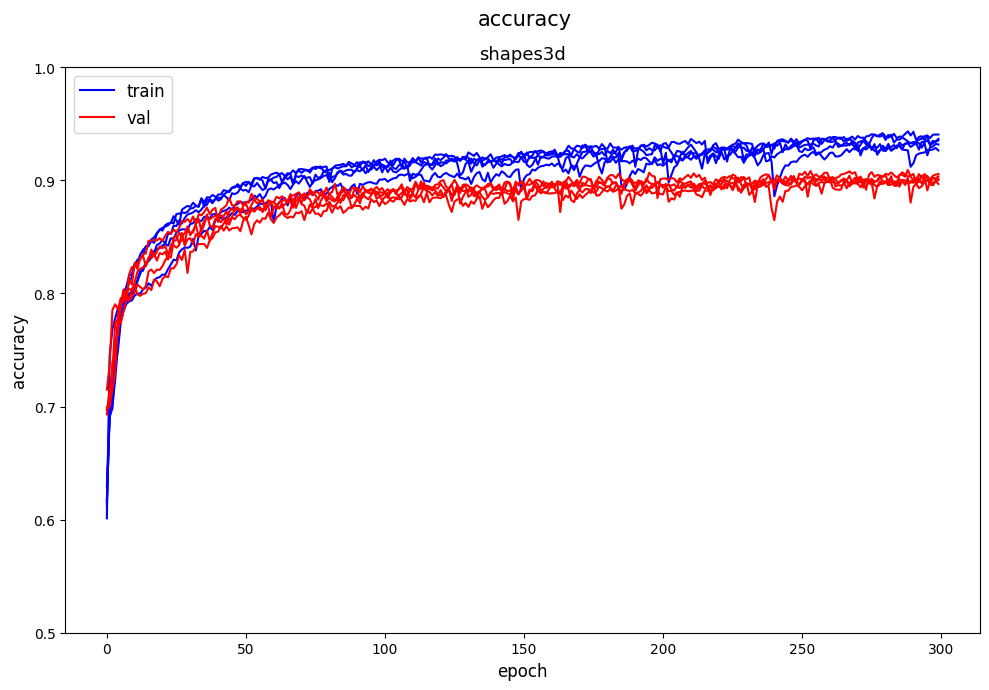

In [8]:
plot_training_trajectory(shapes3d=True, results_train=all_accuracies_3ds['zs_specific_train_acc'], results_val=all_accuracies_3ds['zs_specific_val_acc'], ylim=(0.5, 1), steps=(1, 1), plot_indices=(1, ), plot_shape=(1, 1))

### Comparing Final Training Accuracies (to generic)

In [7]:
# Final Training Accuracies
zs_generic_final_accuracies_train_3ds = {}
zs_generic_final_accuracies_train_st = {}

for i, d in enumerate(datasets):
    gather_accuracies_3ds = []
    gather_accuracies_st = []

    for run in range(5):
        gather_accuracies_3ds.append(all_accuracies_3ds['zs_generic_train_acc'][i][run][-1])
        gather_accuracies_st.append(all_accuracies['zs_generic_train_acc'][i][run][-1])
    zs_generic_final_accuracies_train_3ds = (round(np.mean(gather_accuracies_3ds), 3), round(np.std(gather_accuracies_3ds), 3))
    zs_generic_final_accuracies_train_st = (round(np.mean(gather_accuracies_st), 3), round(np.std(gather_accuracies_st), 3))

# Final Validation accuracies
zs_generic_final_accuracies_val_3ds = {}
zs_generic_final_accuracies_val_st = {}

for i, d in enumerate(datasets):
    gather_accuracies_3ds = []
    gather_accuracies_st = []

    for run in range(5):
        gather_accuracies_3ds.append(all_accuracies_3ds['zs_generic_val_acc'][i][run][-1])
        gather_accuracies_st.append(all_accuracies['zs_generic_val_acc'][i][run][-1])
    zs_generic_final_accuracies_val_3ds = (round(np.mean(gather_accuracies_3ds), 3), round(np.std(gather_accuracies_3ds), 3))
    zs_generic_final_accuracies_val_st = (round(np.mean(gather_accuracies_st), 3), round(np.std(gather_accuracies_st), 3))

In [ ]:
data = {'training': [zs_generic_final_accuracies_train_3ds, zs_generic_final_accuracies_train_st], 
        'validation': [zs_generic_final_accuracies_val_3ds, zs_generic_final_accuracies_val_st]}

comparison_to_generic = pd.DataFrame(data=data, index=["shapes3d", "standard"])
latex_table_2 = comparison_to_generic.to_latex(index=True, escape=False)

print("Final Training Accuracies (to generic):")
print(comparison_to_generic)
# Paper: 0.99, 0.98

Final Training Accuracies (to generic):
                training      validation
shapes3d  (0.929, 0.008)  (0.895, 0.006)
standard  (0.984, 0.014)  (0.973, 0.016)


### Comparing Test Accuracies 

In [9]:
# 3dshapes
zs_specific_test_acc_mean_3ds = np.mean(zs_specific_test_acc_3ds)
zs_generic_test_acc_mean_3ds = np.mean(zs_generic_test_acc_3ds)

# standard
zs_specific_test_acc_mean = np.mean(zs_specific_test_acc)
zs_generic_test_acc_mean = np.mean(zs_generic_test_acc)

In [21]:
data = {'to specific': [zs_specific_test_acc_mean_3ds, zs_specific_test_acc_mean], 
        'to generic': [zs_generic_test_acc_mean_3ds, zs_generic_test_acc_mean]}

comparison_test_acc = pd.DataFrame(data=data, index=["shapes3d", "standard"])
latex_table_3 = comparison_test_acc.to_latex(index=True, escape=False)

print("Comparing Test accuracies (both conditions):")
print(comparison_test_acc)
# Paper: 0.92, 0.71

Comparing Test accuracies (both conditions):
          to specific  to generic
shapes3d     0.822717    0.816950
standard     0.912714    0.709333


### Comparing NMI

In [23]:
# 3dshapes
zs_entropy_scores_specific_3ds, zs_entropy_scores_generic_3ds = load_entropies_zero_shot(path_3ds_zs, context_unaware=context_unaware, zero_shot_test_ds='test_sampled_unscaled')  
entropies_specific_3ds = [zs_entropy_scores_specific_3ds['NMI'], zs_entropy_scores_specific_3ds['effectiveness'], zs_entropy_scores_specific_3ds['consistency']]
entropies_generic_3ds = [zs_entropy_scores_generic_3ds['NMI'], zs_entropy_scores_generic_3ds['effectiveness'], zs_entropy_scores_generic_3ds['consistency']]

# standard
zs_entropy_scores_specific_st, zs_entropy_scores_generic_st = load_entropies_zero_shot(path_zs, context_unaware=context_unaware, zero_shot_test_ds='test_sampled_unscaled')  
entropies_specific_st = [zs_entropy_scores_specific_st['NMI'], zs_entropy_scores_specific_st['effectiveness'], zs_entropy_scores_specific_st['consistency']]
entropies_generic_st = [zs_entropy_scores_generic_st['NMI'], zs_entropy_scores_generic_st['effectiveness'], zs_entropy_scores_generic_st['consistency']]

In [24]:
data = {'to specific': [np.mean(entropies_specific_3ds[0]), np.mean(entropies_specific_st[0])], 
        'to generic': [np.mean(entropies_generic_3ds[0]), np.mean(entropies_generic_st[0])]}

comparison_entropy = pd.DataFrame(data=data, index=["shapes3d", "standard"])
latex_table_2 = comparison_entropy.to_latex(index=True, escape=False)


print("Comparing NMI (both conditions):")
print(comparison_entropy)
# Paper: 0.93, 0.87

Comparing NMI (both conditions):
          to specific  to generic
shapes3d     0.704853    0.704048
standard     0.928658    0.869624
